# Failed Banks ML Project

## Econ 1680: MLTA and Econ

#### Name: Lena Kim

Research Question: Given a failed bank’s balance sheet metrics, how can we predict
whether it is acquired by a national bank, a regional bank, or not acquired at all? Which
metrics contribute the most weight to this decision?

IMPORTANT: This notebook focuses on Principal Component Analysis to perform dimension reduction on our large dataset in order to answer the classification problem posed above. I will import code from the preliminary/overarching notebook ML_BASES with the "run" method.


In [1]:
#econ1680MLProject
%run ML_BASES.ipynb

Standardize data so variables are comparable with each other


In [2]:

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

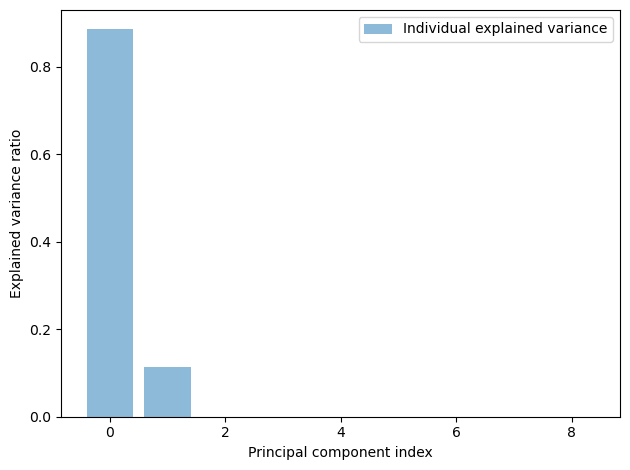

In [3]:
# pca = PCA()
# X_pca = pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Largest variance is total liabilities, probably contributes to high explained variance for first principal 

In [4]:
X.var()

Cash and Investments                  3.515085e+08
Due from FDIC Corp and Receivables    1.450217e+02
Assets in Liquidation                 2.003928e+06
Total Assets                          3.602195e+08
Administrative Liabilities            7.975990e+06
Total Unpaid Other Claimants          1.739786e+12
Uninsured Deposit Claims              7.138292e+07
General Creditor                      7.248301e+10
Total Liabilities                     2.964138e+12
dtype: float64

Let's see if scaling it produces different resutls:

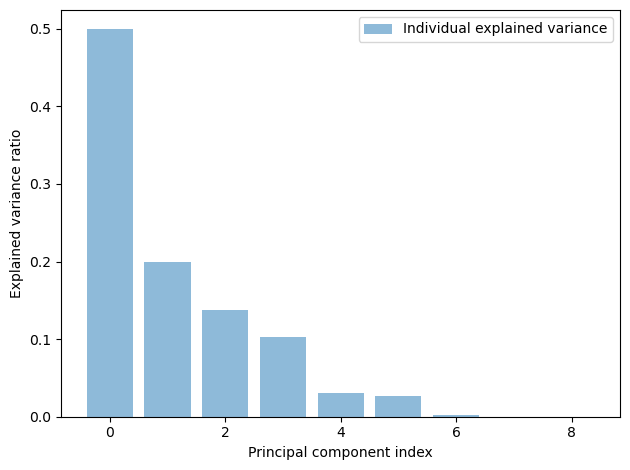

In [5]:
scaler = StandardScaler()
scaler.fit(X_imputed)
X_sc = scaler.transform(X_imputed)
X_sc_pca = pca.fit_transform(X_sc)
exp_var_sc_pca = pca.explained_variance_ratio_
plt.bar(range(0,len(exp_var_sc_pca)), exp_var_sc_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## cluster analysis

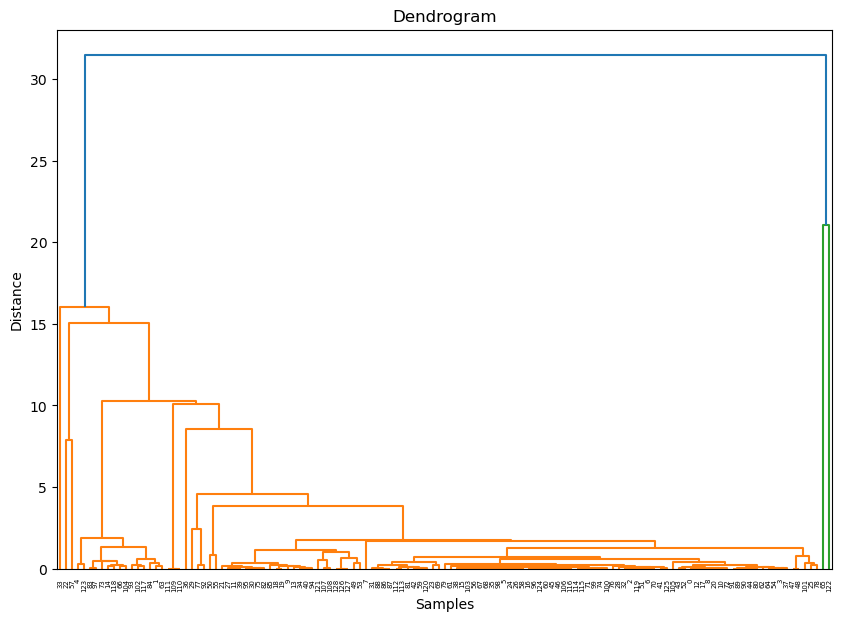

In [10]:
#Dendrogram:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X_sc_pca, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
           

In [11]:
num_clusters = 2

#initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

#fit and get cluster labels
kmeans.fit(X_sc_pca)

cluster_labels = kmeans.labels_
#Assign cluster labels to orignal df:
banks_relevant['Cluster'] = cluster_labels

print(banks_relevant['Cluster'].value_counts()) #display the count of samples in each cluster


#explore cluster characterisitcs
cluster_centers = kmeans.cluster_centers_
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_df

Cluster
0    127
1      2
Name: count, dtype: int64


/var/folders/49/g760rt7d15d8ccv3qs_4dys80000gn/T/ipykernel_9488/2274490739.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks_relevant['Cluster'] = cluster_labels


,Cash and Investments,Due from FDIC Corp and Receivables,Assets in Liquidation,Total Assets,Administrative Liabilities,Total Unpaid Other Claimants,Uninsured Deposit Claims,General Creditor,Total Liabilities
0,-0.240752,-0.021476,0.003616,0.042593,0.006789,0.008668,0.000886,-0.000008,-0.000003
1,15.287733,1.363720,-0.229603,-2.704667,-0.431125,-0.550443,-0.056270,0.000486,0.000213
